### Mounting

In [7]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Extraction

In [8]:
FLDR='drive/MyDrive/dogs_vs_cat_mod/'

In [9]:
import os

In [10]:
files=os.listdir(FLDR)

In [47]:
files

['train.zip', 'test1.zip', 'extracted', 'extracted_2', 'sampleSubmission.csv']

In [11]:
train_data=files[1]

In [12]:
train_data

'train.zip'

In [9]:
import zipfile

In [14]:
archive=zipfile.ZipFile(FLDR+train_data)

In [15]:
archive.extractall(FLDR+'extracted')

In [16]:
files=os.listdir(FLDR)

In [17]:
files

['sampleSubmission.csv', 'train.zip', 'test1.zip', 'extracted']

In [6]:
test_data=files[2]

In [7]:
test_data

'test1.zip'

In [10]:
archive=zipfile.ZipFile(FLDR+test_data)

In [11]:
archive.extractall(FLDR+'extracted_2')

In [12]:
files=os.listdir(FLDR)

In [13]:
files

['sampleSubmission.csv', 'train.zip', 'test1.zip', 'extracted', 'extracted_2']

In [14]:
test_point_meta=files[0]

In [15]:
test_point_meta

'sampleSubmission.csv'

In [16]:
import pandas as pd

In [18]:
df_meta=pd.read_csv(FLDR+test_point_meta)

In [19]:
df_meta.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [20]:
def ret_name(name):
  return str(name)+'.jpg'

In [21]:
df_meta['id']=df_meta['id'].apply(ret_name)

In [22]:
df_meta.head()

,id,label
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [23]:
df_meta.to_csv(FLDR+test_point_meta,index=False)

### Creating dataset for Generator

In [37]:
files_in_test=FLDR+'extracted_2/test1/'

In [4]:
files=os.listdir(FLDR)

In [48]:
files_train=FLDR+'extracted/train'

In [49]:
files_train

'drive/MyDrive/dogs_vs_cat_mod/extracted/train'

In [ ]:
files=[]
labels=[]
for file in os.listdir(files_train):
  print(file)
  files.append(file)
  if 'cat' in file:
    labels.append(0)
  else:
    labels.append(1)


In [51]:
import pandas as pd

In [52]:
df_train_meta= pd.DataFrame(list(zip(files,labels)),columns=['id','label'])

In [53]:
df_train_meta.head()

,id,label
0,dog.9099.jpg,1
1,dog.91.jpg,1
2,dog.910.jpg,1
3,dog.9100.jpg,1
4,dog.9101.jpg,1


In [54]:
files=os.listdir(FLDR)

In [55]:
files

['train.zip', 'test1.zip', 'extracted', 'extracted_2', 'sampleSubmission.csv']

In [14]:
df_test_meta=pd.read_csv(FLDR+files[-1])

In [15]:
df_test_meta.head()

,id,label
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [56]:
train=['extracted/train/' for i in range(len(df_train_meta))]
test=['extracted_2/test1/' for i in range(len(df_test_meta))]

In [57]:
df_test_meta['Ext']=test
df_train_meta['Ext']=train

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
train,val= train_test_split(df_train_meta, test_size=0.15)

In [61]:
train.to_csv(FLDR+'train.csv')
val.to_csv(FLDR+'val.csv')
df_test_meta.to_csv(FLDR+'test.csv')

In [62]:
fldrs_req=["Train","Test","Validate"]
fldrs_within=["Cat","Dog"]

In [63]:
for fldr in fldrs_req:
  os.mkdir(FLDR+fldr)
  for fldr_2 in fldrs_within:
    os.mkdir(FLDR+fldr+'/'+fldr_2)

In [64]:
import shutil

In [65]:
i=0
while (i<len(train)):
  if train.iloc[i]['label']==0:
    shutil.move(FLDR+train.iloc[i]['Ext']+train.iloc[i]['id'],FLDR+'Train/Cat')
  if train.iloc[i]['label']==1:
    shutil.move(FLDR+train.iloc[i]['Ext']+train.iloc[i]['id'],FLDR+'Train/Dog')
  i+=1

In [ ]:
i=0
while (i<len(val)):
  if val.iloc[i]['label']==0:
    shutil.move(FLDR+val.iloc[i]['Ext']+val.iloc[i]['id'],FLDR+'Validate/Cat')
  if val.iloc[i]['label']==1:
    shutil.move(FLDR+val.iloc[i]['Ext']+val.iloc[i]['id'],FLDR+'Validate/Dog')
  i+=1

In [ ]:
i=0
test=df_test_meta
while (i<len(test)):
  if test.iloc[i]['label']==0:
    shutil.move(FLDR+test.iloc[i]['Ext']+test.iloc[i]['id'],FLDR+'Test/Cat')
  if test.iloc[i]['label']==1:
    shutil.move(FLDR+test.iloc[i]['Ext']+test.iloc[i]['id'],FLDR+'Test/Dog')
  i+=1

### Starting for Training

In [4]:
import pandas as pd

In [11]:
train=pd.read_csv(FLDR+'train.csv')
val=pd.read_csv(FLDR+'val.csv')
df_test_meta=pd.read_csv(FLDR+'test.csv')

### Initializing Image Data Generator

In [2]:
from tensorflow.keras.applications.vgg19 import preprocess_input

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_set=ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.1,
    shear_range=0.2,
    preprocessing_function=preprocess_input
)

In [14]:
val_set=ImageDataGenerator(preprocessing_function=preprocess_input)

In [27]:
train_generator = train_set.flow_from_directory(
    directory=FLDR+"Train/",
    target_size=(256, 256),
    batch_size=64,
    class_mode="binary"
)

Found 21250 images belonging to 2 classes.


In [28]:
validate_generator = val_set.flow_from_directory(
    directory=FLDR+"Validate/",
    target_size=(256, 256),
    batch_size=64,
    class_mode="binary"
)

Found 3750 images belonging to 2 classes.


In [29]:
test_generator = val_set.flow_from_directory(
    directory=FLDR+"Test/",
    target_size=(224, 224),
    batch_size=64,
    class_mode="binary"
)

Found 12500 images belonging to 2 classes.


### Modelling

In [30]:
from tensorflow.keras.applications import VGG19

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [98]:
base_model=VGG19(include_top=False, weights='imagenet',input_shape=(224,224,3))

In [32]:
from tensorflow.keras.layers import UpSampling2D,Conv2D,Concatenate

In [100]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
def get_model(shape=(256,256,3)):
  input_tensor=Input(shape)

  base_model=VGG19(include_top=False, weights='imagenet',input_tensor=input_tensor)
  layer_names = ["block5_pool", "block4_pool", "block3_pool", "block2_pool"] 
  layer_outputs = [base_model.get_layer(name).output for name in layer_names]

  feature_size=256

  C1,C2,C3,C4= layer_outputs

  P1=Conv2D(feature_size, kernel_size=1, strides=1, padding='same')(C1)
  P1_upsampled=UpSampling2D(size=(2, 2))(P1)
  P1=Conv2D(feature_size, kernel_size=3, strides=1, padding='same')(P1)

  P2=Conv2D(feature_size, kernel_size=1, strides=1, padding='same')(C2)
  P2=Concatenate()([P1_upsampled, P2])
  P2_upsampled=UpSampling2D(size=(2, 2))(P2)
  P2=Conv2D(feature_size, kernel_size=3, strides=1, padding='same')(P2)

  P3=Conv2D(feature_size, kernel_size=1, strides=1, padding='same')(C3)
  P3=Concatenate()([P2_upsampled, P3])
  P3_upsampled=UpSampling2D(size=(2, 2))(P3)
  P3=Conv2D(feature_size, kernel_size=3, strides=1, padding='same')(P3)

  P4=Conv2D(feature_size, kernel_size=1, strides=1, padding='same')(C4)
  P4=Concatenate()([P3_upsampled, P4])
  P4_upsampled=UpSampling2D(size=(2, 2))(P4)
  P4=Conv2D(feature_size, kernel_size=3, strides=1, padding='same')(P4)

  feature1 = Flatten()(P1)
  dp1 = Dropout(0.4)(feature1)
  preds1 = Dense(4, activation='relu')(dp1)

  feature2 = Flatten()(P2)
  dp2 = Dropout(0.4)(feature2)
  preds2 = Dense(4, activation='relu')(dp2)

  feature3 = Flatten()(P3)
  dp3 = Dropout(0.4)(feature3)
  preds3 = Dense(4, activation='relu')(dp3)

  feature4 = Flatten()(P4)
  dp4 = Dropout(0.4)(feature4)
  preds4 = Dense(4, activation='relu')(dp4)

  concatenated=Concatenate(axis=1)([preds1,preds2,preds3,preds4])
  out=Dense(1,activation='sigmoid')(concatenated)

  model = Model(inputs=base_model.input, outputs=out)
  for layer in model.layers:
    layer.trainable = True

  model.compile(optimizer=optimizers.Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [34]:
Model=get_model()

In [35]:
Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 256, 256, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 256, 256, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 128, 128, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [110]:
from keras.utils.vis_utils import plot_model

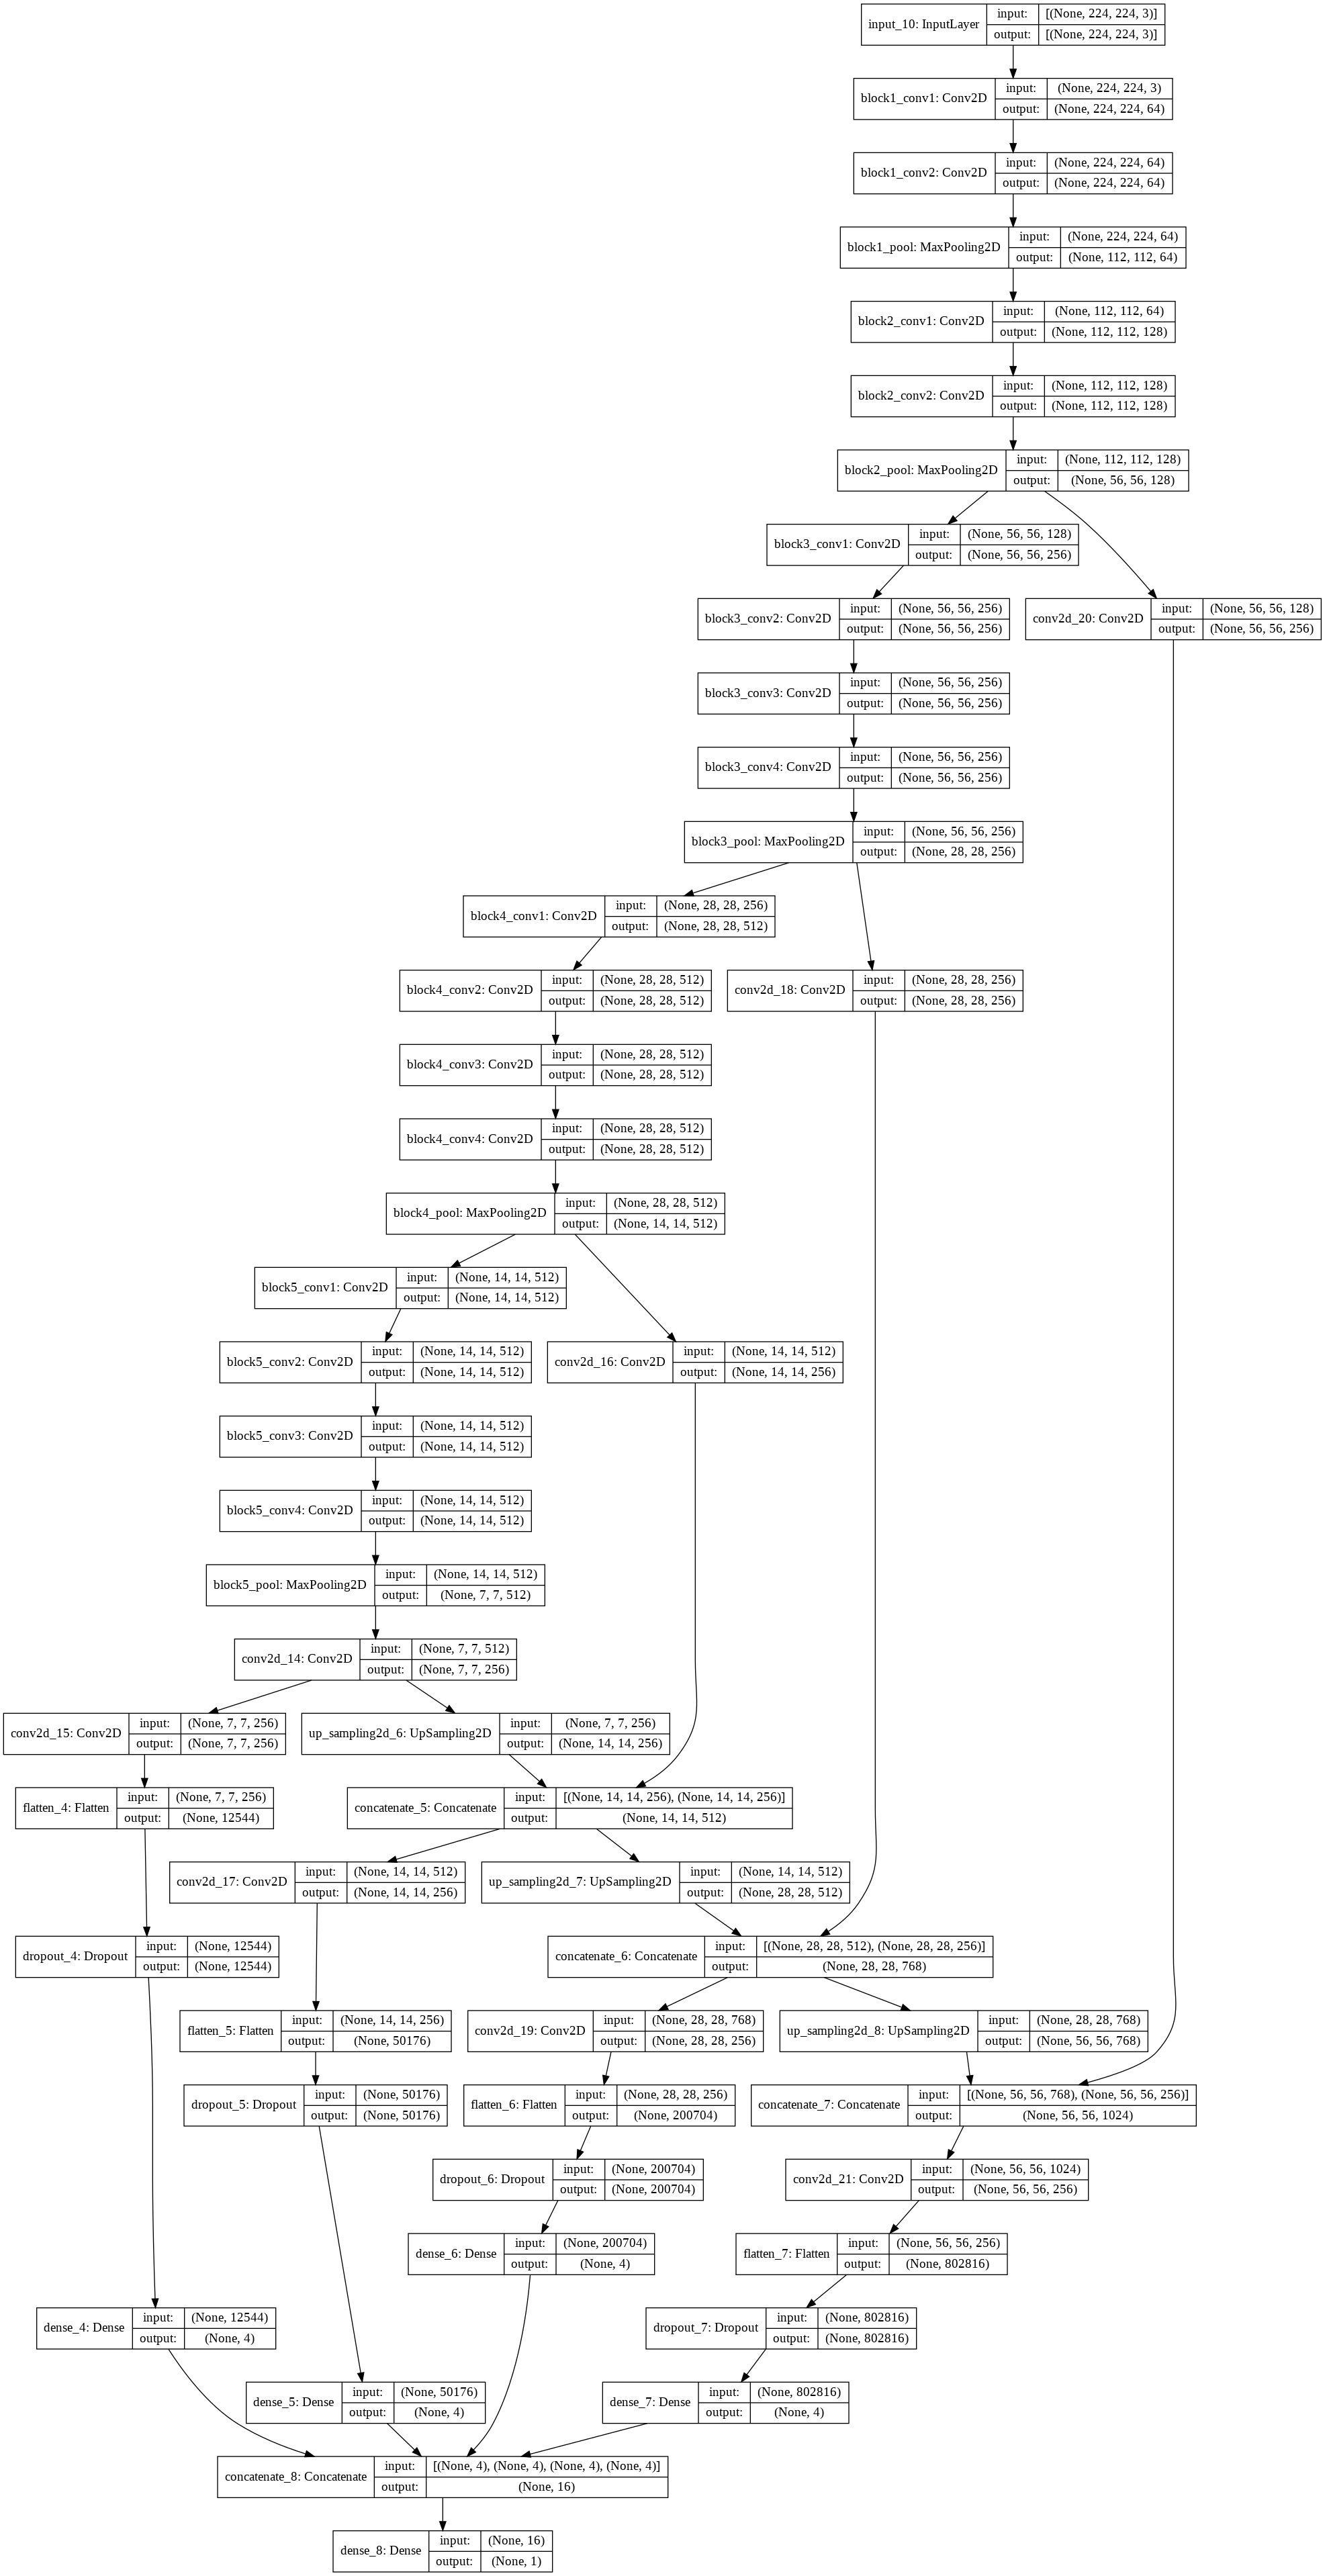

In [111]:
plot_model(Model, to_file=fldr+'model_plot.png', show_shapes=True, show_layer_names=True)

### Training

In [36]:
checkpoint = ModelCheckpoint(FLDR+"FPN_Model.h5", monitor='val_accuracy', save_best_only=True, mode='max') #creating checkpoint to save the best validation accuracy
callbacks_list = [checkpoint]

In [ ]:
history = Model.fit_generator(train_generator, validation_data = validate_generator, steps_per_epoch=50, callbacks=callbacks_list,verbose=1,epochs = 30)

### Testing

In [ ]:
Model.evaluate_generator(train_generator)

In [ ]:
Model.evaluate_generator(validation_generator)

In [ ]:
Model.evaluate_generator(test_generator)

In [ ]:
pred1=Model.predict_generator(test_generator)

In [ ]:
import numpy as np

In [ ]:
pred_n=np.round(pred_1)

In [ ]:
pred_n=np.reshape((len(pred_n),)

In [ ]:
true_lab=test_generator.classes

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(true_lab,pred_n))

In [ ]:
print(confusion_matrix(true_lab,pred_n))